In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely import geometry
#import rasterio

# show all columns
pd.set_option('display.max_columns', None)

In [2]:
data_path = '/home/data/'
# !ls $data_path

In [3]:
# Add a background map to the plot
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    #xmin, xmax, ymin, ymax = ax.axis()
    xmin, xmax, ymin, ymax = -7925000, -7895000, 5195000, 5220000
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))
    
# Convert coordinates of a geopandas and plot on a bg map
def plot_on_map(geodf, col='k'):
    ax = geodf.to_crs(epsg=3857).plot(figsize=(10, 10), alpha=0.5, edgecolor=col)
    add_basemap(ax, zoom=12)
    
# Convert to WGS 84 (Ellipsoidal 2D lat/long in degree)
# See https://epsg.io/4326
def to_lat_long(geodf):
    return geodf.to_crs({'init': 'epsg:4326'})

# Convert to WGS 84 Pseudo-Mercator (cartesian 2D X/Y in meter) used in Google Maps, OpenStreetMap, ArcGIS, ESRI, ...
# See https://epsg.io/3857
def to_x_y(geodf):
    return geodf.to_crs({'init': 'epsg:3857'})

# Convert types for GeoJSON file writing with fiona
upcast_dispatch = {geometry.Point: geometry.MultiPoint, 
                   geometry.LineString: geometry.MultiLineString,
                   geometry.Polygon: geometry.MultiPolygon}
def maybe_cast_to_multigeometry(geom):
    caster = upcast_dispatch.get(type(geom), lambda x: x[0])
    return caster([geom])


OBJECTID  SEGMENT_ID L_F_ADD L_T_ADD R_F_ADD R_T_ADD PRE_DIR  \
0             1           1      12      22      13      29           
1             2           2      24      42      31      43           
2             3           3      44      64      45      67           
3             4           4      66      72      69      71           
4             5           5      74      90      73      87           
5             6           6      92      98      89      99           
6             7           7     100     130     101     121           
7             8          10     306     322     307     313           
8             9          11       2      52       1      25           
9            10          12      54      98      27      99           
10           11          13      35       1      36       2           
11           12          14       2      22       1      23           
12           13          15       2      22       1      23           
13           14          16       2      24      48      26           
14           15          17      70      78      69      79           
15           16          18     106     112     101     111           
16           17          19     114     120     113     121           
17           18          20     122     198     123     199           
18           19          22      28      42      25      41           
19           20          23      44      64      43      63           
20           21          24      66      98      65      99           
21           22          25       2      98       1      97           
22           23          26      13       1      14       2           
23           24          27       2       4       1       3           
24           25          28       2      20       1      19           
25           26          29       1      17       2      18           
26           27          30       2      14       1      15           
27           28          31       1       3       2       4           
28           29          32       2       2       1       1           
29           30          34      34      54      33      53           
...         ...         ...     ...     ...     ...     ...     ...   
18976     18977        3153      39       1      38       2           
18977     18978       17907       2      28       1      29           
18978     18979        5644      30      58      31      59           
18979     18980        5645      60      98      61      99           
18980     18981        2371       1      11       2      12           
18981     18982        9520      12      24       9      21           
18982     18983        2368       2      10       1       7           
18983     18984       26936       2      50       1      49           
18984     18985       26935      52      60      51      59           
18985     18986       15645       2      50       1      49           
18986     18987       26937      52     130      51     129           
18987     18988       22888      10      60      11      59       E   
18988     18989       27047      62      90      61      89       E   
18989     18990       23146                      28       2           
18990     18991       26871     148     170                           
18991     18992       27048     112     122     111     123           
18992     18993       27049      17       1                           
18993     18994        5742    None    None    None    None           
18994     18995         659     105     105     110     106           
18995     18996       27050     103      69     104      68           
18996     18997       18721      50      52      51      51           
18997     18998       18722      32      48      33      49           
18998     18999        8485       2       8       1       7           
18999     19000       26573      14      24      15      27           
19000     19001       27051    

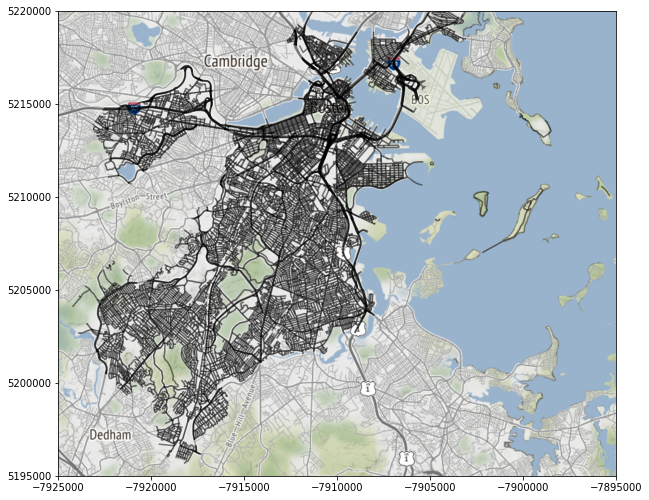

In [4]:
# Load Boston street segments
bostonsegs = gpd.read_file(data_path + 'Boston_Street_Segments.geojson')
plot_on_map(bostonsegs)
bostonsegs

OBJECTID Route_ID  From_Measure  To_Measure         Route_System  \
0           856    B0240 -3.000000e-08    0.007570  Bicycle/ Pedestrian   
1           858    B0240  1.428347e-02    0.036695  Bicycle/ Pedestrian   
2           860    B0240  4.002117e-02    0.228611  Bicycle/ Pedestrian   
3           882    B0246 -3.000000e-08    0.139643  Bicycle/ Pedestrian   
4           883    B0247 -3.000000e-08    0.082351  Bicycle/ Pedestrian   
5           884    B0247  8.235088e-02    0.097026  Bicycle/ Pedestrian   
6           885    B0247  9.702633e-02    0.481579  Bicycle/ Pedestrian   
7           886    B0248 -3.000000e-08    0.010215  Bicycle/ Pedestrian   
8           887    B0248  1.021486e-02    0.133923  Bicycle/ Pedestrian   
9           888    B0248  1.339225e-01    0.142677  Bicycle/ Pedestrian   
10          890    B0248  1.546857e-01    0.190878  Bicycle/ Pedestrian   
11          891    B0249 -3.000000e-08    0.012596  Bicycle/ Pedestrian   
12         1019    B0283  2.036507e+00    2.194084  Bicycle/ Pedestrian   
13         1020    B0283  2.194084e+00    2.482262  Bicycle/ Pedestrian   
14         1021    B0283  2.482262e+00    2.490618  Bicycle/ Pedestrian   
15         1022    B0283  2.490618e+00    3.262805  Bicycle/ Pedestrian   
16         1023    B0283  3.262805e+00    3.270191  Bicycle/ Pedestrian   
17         1024    B0283  3.270191e+00    3.276475  Bicycle/ Pedestrian   
18         1025    B0283  3.276475e+00    4.061656  Bicycle/ Pedestrian   
19         1027    B0283  4.093485e+00    5.306893  Bicycle/ Pedestrian   
20         1028    B0283  5.306893e+00    5.309348  Bicycle/ Pedestrian   
21         1029    B0283  5.309348e+00    5.313129  Bicycle/ Pedestrian   
22         1030    B0283  5.313129e+00    5.832755  Bicycle/ Pedestrian   
23         1031    B0283  5.832755e+00    6.049942  Bicycle/ Pedestrian   
24         1032    B0283  6.049942e+00    6.053188  Bicycle/ Pedestrian   
25         1033    B0283  6.053188e+00    6.117938  Bicycle/ Pedestrian   
26         1035    B0283  6.135248e+00    6.591459  Bicycle/ Pedestrian   
27         1037    B0283  6.620120e+00    6.762021  Bicycle/ Pedestrian   
28         1039    B0283  6.766747e+00    6.919261  Bicycle/ Pedestrian   
29         1041    B0283  6.925375e+00    7.442834  Bicycle/ Pedestrian   
...         ...      ...           ...         ...                  ...   
29136    621269  US20 WB  3.054561e+00    3.070210           US Highway   
29137    621270  US20 WB  3.070210e+00    3.070677           US Highway   
29138    621271  US20 WB  3.070677e+00    3.113115           US Highway   
29139    621272  US20 WB  3.113115e+00    3.123450           US Highway   
29140    621273  US20 WB  3.123450e+00    3.193961           US Highway   
29141    621274  US20 WB  3.193961e+00    3.200250           US Highway   
29142    621275  US20 WB  3.200250e+00    3.215585           US Highway   
29143    621276  US20 WB  3.215585e+00    3.251881           US Highway   
29144    621277  US20 WB  3.251881e+00    3.264304           US Highway   
29145    621278  US20 WB  3.264304e+00    3.272618           US Highway   
29146    621279  US20 WB  3.272618e+00    3.280992           US Highway   
29147    621280  US20 WB  3.280992e+00    3.290891           US Highway   
29148    621281  US20 WB  3.290891e+00    3.297965           US Highway   
29149    621282  US20 WB  3.297965e+00    3.301970           US Highway   
29150    621283  US20 WB  3.301970e+00    3.304065           US Highway   
29151    621284  US20 WB  3.304065e+00    3.306721           US Highway   
29152    621285  US20 WB  3.306721e+00    3.311844           US Highway   
29153    621286  US20 WB  3.311844e+00    3.319293           US Highway   
29154    621287  US20 WB  3.319293e+00    3.343852           US Highway   
29155    621288  US20 WB  3.343852e+00    3.358863           US Highway   
29156    621289  US20 WB  3.358863e+00    3.365468           US Highway   
29157    621290  US20 WB  3.3654

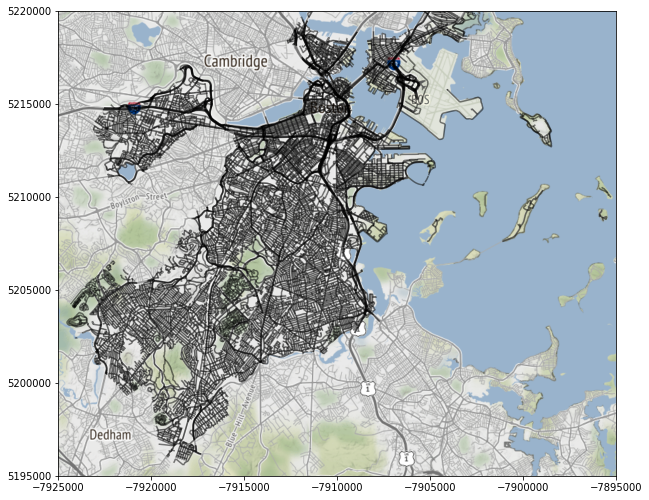

In [5]:
# Load all the MA roads restricted to the Boston area
rebuild = 0
if rebuild:
    masegs = gpd.read_file(data_path + 'Road_Inventory_2017.geojson', bbox=bostonsegs.envelope) # loading around the boston area
    masegs = masegs[masegs.City == 'Boston']
    masegs.index = range(len(masegs.index))
    masegs = to_x_y(masegs)
    masegs.geometry = masegs.geometry.apply(maybe_cast_to_multigeometry)
    masegs.to_file(data_path + 'Road_Inventory_2017_Bostonsubset.geojson', driver='GeoJSON')
else:
    masegs = gpd.read_file(data_path + 'Road_Inventory_2017_Bostonsubset.geojson')

bostonsegs = to_x_y(bostonsegs) # convert only now because used in bbox above
plot_on_map(masegs)
masegs

In [56]:
masegs['AADT_Deriv'].value_counts()

14                                                                                                        9154
MassDOT Highway Special Count                                                                             1168
Derived from factoring counts from the previous year count-base AADT that is less than three years old     723
Derived from count data that is three or more years old                                                    497
Derived from counts collected on or adjacent to the section during the current year                        333
Derived from an estimate                                                                                   281
Name: AADT_Deriv, dtype: int64

FID  OBJECTID                           STREET_NAM  ROADINVENT  \
0     1001      8777                        Warren Street     4714200   
1     1002      8785                     Blue Hill Avenue     5175300   
2     1003      8792                     Blue Hill Avenue     6282300   
3     1004      8794                     Blue Hill Avenue     4966300   
4     1005      8803                        Morton Street     5690800   
5     1006      8804              American Legion Highway     6236100   
6     1007      8810                        Walnut Avenue     5308200   
7     1008      8811                        Walnut Avenue     4710200   
8     1009      8834                      Thornton Street     5832200   
9     1010      8848                       Tremont Street     5780900   
10    1011      8854                    Huntington Avenue     6261600   
11    1012      8855                          Museum Road     5381200   
12    1013      8856                       Ruggles Street     6305500   
13    1014      8857                          Forsyth Way     5424900   
14    1015      8863                  Commonwealth Avenue     6224600   
15    1016      8864                     Brookline Avenue    45732100   
16    1017      8883                     Blue Hill Avenue     5124200   
17    1018      8885                     Blue Hill Avenue     6223900   
18    1019      8892                     Blue Hill Avenue     6218800   
19    1020      8893                     Blue Hill Avenue     6219100   
20    1021      8899                     Blue Hill Avenue     6219300   
21    1022      8900                     Blue Hill Avenue     6219400   
22    1023      8902                     Blue Hill Avenue     4856600   
23    1024      8903                     Blue Hill Avenue     5111300   
24    1025      8910                     Blue Hill Avenue     4805400   
25    1026      8911                        Talbot Avenue     5691000   
26    1027      8913                     Blue Hill Avenue     6227300   
27    1028      8921                      Humboldt Avenue     4693200   
28    1029      8922                      Humboldt Avenue     4683800   
29    1030      8923                      Humboldt Avenue     4674200   
...    ...       ...                                  ...         ...   
2578  2579     18277                       Harvard Avenue     5871600   
2579  2580     19025                        Columbia Road     6246500   
2580  2581     20867  Emerald Necklace Trail/Sears Rotary           0   
2581  2582     18293                 North Harvard Street     4451700   
2582  2583     19027                        Columbia Road     5776500   
2583  2584     20869               Emerald Necklace Trail           0   
2584  2585     18295                     Cambridge Street     6264900   
2585  2586     19029                        Columbia Road     6246600   
2586  2587     20870               Emerald Necklace Trail           0   
2587  2588     19031                     Blue Hill Avenue     5223400   
2588  2589     18297                     Cambridge Street     5609600   
2589  2590     19034                        Warren Street     4695700   
2590  2591     18300                 North Harvard Street     5753500   
2591  2592     20871                                                0   
2592  2593     19035                        Warren Street     6263600   
2593  2594     18307                 North Harvard Street     5738800   
2594  2595     20873               Emerald Necklace Trail           0   
2595  2596     19037                        Warren Street     5601800   
2596  2597     18343                      Cummins Highway     5540200   
2597  2598     20877                                                0   
2598  2599     19051                        Warren Street     6286500   
2599  2600     20881                    Boston Harborwalk           0   
2600  2601     19058                    Washington Street     460

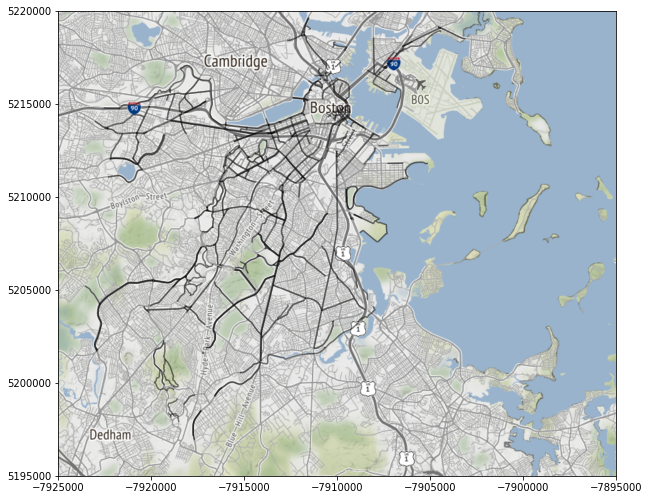

In [27]:
# Load the Boston bike lane network
# Notes:
# - LTS is level of traffic stress range [0,4]
geolanes = gpd.read_file(data_path + 'Existing_Bike_Network.geojson')
geolanes = to_x_y(geolanes)
# geolanes = geolanes[geolanes.InstallDat != '0'] # drop lanes without construction date
# geolanes.index = range(len(geolanes.index))

# Simplify the bike lane types
print(geolanes['ExisFacil'].value_counts())
simplified_bl_cat = {
    'BL':'exclusive',
    'SLM':'shared',
    'SUP':'protected',
    'CL':'exclusive',
    'BFBL':'exclusive',
    'SUC':'protected',
    'BSBL':'shared',
    'CT1-2':'protected',
    'CTBL':'protected',
    'PSL':'shared',
    'SRd':'shared',
    ' ':'shared',
    'SUB':'shared',
    'CT2-1':'protected',
    'PBFBL':'exclusive',
    'CT1-1':'protected',
    'PS':'shared',
    'BFCL':'exclusive',
    'CFBL':'protected',
    'SLM\r\n':'shared',
    'SLM\r\nSLM':'shared'
}
geolanes['ExisFacil'] = geolanes['ExisFacil'].map(simplified_bl_cat).astype('category')
print(geolanes['ExisFacil'].value_counts())

plot_on_map(geolanes)
geolanes

1808
1729


ID    YEAR       DATE   DAY_WEEK        TIME TYPE   SOURCE  \
0     B1001  2009.0 2009-01-09     Friday  1899-12-30  BVA     E911   
1     B1002  2009.0 2009-01-23     Friday  1899-12-30  BVA  ON-SITE   
2     B1003  2009.0 2009-01-25     Sunday  1899-12-30  BVA     E911   
3     B1004  2009.0 2009-02-05   Thursday  1899-12-30  BVA     E911   
4     B1005  2009.0 2009-02-08     Sunday  1899-12-30  BVA     E911   
5     B1006  2009.0 2009-02-09     Monday  1899-12-30  BVA     E911   
6     B1008  2009.0 2009-02-13     Friday  1899-12-30  BVA     E911   
7     B1009  2009.0 2009-02-13     Friday  1899-12-30  BVA     E911   
8     B1010  2009.0 2009-02-19   Thursday  1899-12-30  BVA     E911   
9     B1011  2009.0 2009-02-21   Saturday  1899-12-30  BVP     E911   
10    B1012  2009.0 2009-02-25  Wednesday  1899-12-30  BVA     E911   
11    B1013  2009.0 2009-03-01   Saturday  1899-12-30  BVA     E911   
12    B1014  2009.0 2009-03-01     Sunday  1899-12-30  BVA     E911   
13    B1015  2009.0 2009-03-05   Thursday  1899-12-30  BVA     E911   
14    B1016  2009.0 2009-03-05   Thursday  1899-12-30  BVA     E911   
15    B1017  2009.0 2009-03-12   Thursday  1899-12-30  BVA     E911   
16    B1018  2009.0 2009-03-15     Sunday  1899-12-30   CO     E911   
17    B1019  2009.0 2009-03-16     Monday  1899-12-30  BVA     E911   
18    B1020  2009.0 2009-03-18  Wednesday  1899-12-30  BVA     E911   
19    B1021  2009.0 2009-03-22     Sunday  1899-12-30  BVA     E911   
20    B1022  2009.0 2009-03-22     Sunday  1899-12-30  BVA     E911   
21    B1023  2009.0 2009-03-22     Sunday  1899-12-30  BVA     E911   
22    B1024  2009.0 2009-03-22     Sunday  1899-12-30  BVA     E911   
23    B1025  2009.0 2009-03-23     Monday  1899-12-30  BVA     E911   
24    B1026  2009.0 2009-03-24    Tuesday  1899-12-30  BVA     E911   
25    B1027  2009.0 2009-03-24    Tuesday  1899-12-30  BVA     E911   
26    B1029  2009.0 2009-03-25  Wednesday  1899-12-30  BVA     E911   
27    B1030  2009.0 2009-03-27     Friday  1899-12-30  BVA     E911   
28    B1031  2009.0 2009-03-27     Friday  1899-12-30  BVA     E911   
29    B1032  2009.0 2009-03-28   Saturday  1899-12-30  BVA     E911   
...     ...     ...        ...        ...         ...  ...      ...   
1699  B2782  2012.0 2012-11-16     Friday  1899-12-30  BVA     E911   
1700  B2783  2012.0 2012-11-17     Friday  1899-12-30  BVA  ON-SITE   
1701  B2784  2012.0 2012-11-18     Sunday  1899-12-30  BVA  ON-SITE   
1702  B2785  2012.0 2012-11-18     Sunday  1899-12-30  BVA     E911   
1703  B2786  2012.0 2012-11-15   Thursday  1899-12-30  BVB  WALK-IN   
1704  B2787  2012.0 2012-11-20    Tuesday  1899-12-30  BVA     E911   
1705  B2788  2012.0 2012-11-20    Tuesday  1899-12-30  BVA     E911   
1706  B2789  2012.0 2012-11-20    Tuesday  1899-12-30  BVA     E911   
1707  B2790  2012.0 2012-11-21  Wednesday  1899-12-30  BVP     E911   
1708  B2791  2012.0 2012-11-21  Wednesday  1899-12-30  BVA     E911   
1709  B2792  2012.0 2012-11-23     Friday  1899-12-30  BVA  ON-SITE   
1710  B2793  2012.0 2012-11-23     Friday  1899-12-30  BVA  WALK-IN   
1711  B2794  2012.0 2012-11-24   Saturday  1899-12-30  BVA     E911   
1712  B2795  2012.0 2012-11-25     Sunday  1899-12-30  BVA     E911   
1713  B2796  2012.0 2012-11-26     Monday  1899-12-30  BVA     E911   
1714  B2797  2012.0 2012-11-29   Thursday  1899-12-30  BVA  ON-SITE   
1715  B2798  2012.0 2012-11-29   Thursday  1899-12-30  BVA      N/A   
1716  B2799  2012.0 2012-12-03     Monday  1899-12-30  BVA     E911   
1717  B2800  2012.0 2012-12-03     Monday  1899-12-30  BVA  ON-SITE   
1718  B2801  2012.0 2012-12-04    Tuesday  1899-12-30  BVA     E911   
1719  B2802  2012.0 2012-12-04    Tuesday  1899-12-30  BVA     E911   
1720  B2803  2012.0 2012-12-05  Wednesday  1899-12-30  BVA     E911   
1721  B2804  2012.0 2012-12-06   Thursday  1899-12-30  BVA     E911   
1722  B2805  2012.0 2012-12-06   Thursday  1899-12-30  BVA     E911   
1723  B2806  2012.0 2012-12-05  W

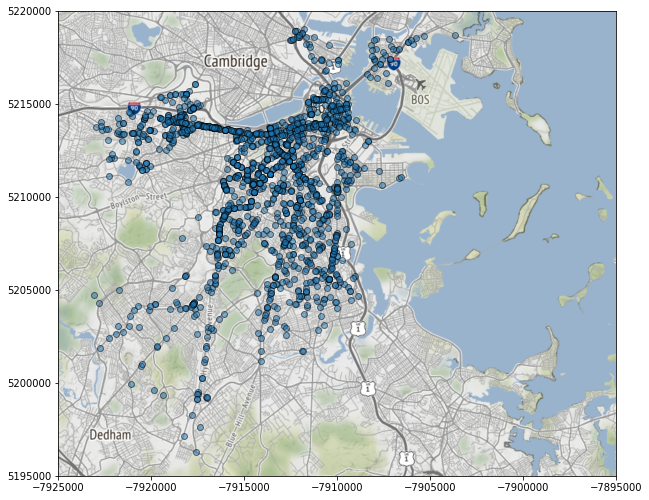

In [61]:
# Load the first crash dataset (2009-2012)
crash1 = pd.read_excel(data_path + 'dataverse_files/Final Bike Collision Database.xlsx') # 1808 reports
print(len(crash1))

geocrash1 = gpd.read_file(data_path + 'dataverse_files/Bike Collisions/') # 1732 reports ???
geocrash1.drop(geocrash1.index[-3:], inplace=True) # bad last row
geocrash1['DATE'] = pd.to_datetime(geocrash1['DATE'])
#geocrash1 = geocrash1.query('ISINTERSEC == 0')
#geocrash1.index = range(len(geocrash1.index))
print(len(geocrash1))
geocrash1 = to_x_y(geocrash1)
plot_on_map(geocrash1)
geocrash1

dispatch_ts mode_type location_type                 street  \
0    2015-01-01 18:23:57      bike  Intersection                    NaN   
1    2015-01-02 22:27:44      bike        Street          KENSINGTON ST   
2    2015-01-05 08:08:13      bike        Street             TERRACE ST   
3    2015-01-05 12:00:18      bike        Street         DORCHESTER AVE   
4    2015-01-12 13:28:03      bike  Intersection                    NaN   
5    2015-01-12 16:59:16      bike  Intersection                    NaN   
6    2015-01-15 20:45:29      bike  Intersection                    NaN   
7    2015-01-20 06:35:06      bike  Intersection                    NaN   
8    2015-01-20 08:25:47      bike        Street            WOODROW AVE   
9    2015-01-22 00:14:22      bike        Street              FOURTH ST   
10   2015-01-22 08:54:57      bike  Intersection                    NaN   
11   2015-01-22 18:55:01      bike  Intersection                    NaN   
12   2015-01-23 23:03:49      bike  Intersection                    NaN   
13   2015-01-24 02:32:54      bike  Intersection                    NaN   
14   2015-02-26 09:59:26      bike  Intersection                    NaN   
15   2015-02-26 18:59:40      bike  Intersection                    NaN   
16   2015-03-09 20:19:56      bike  Intersection                    NaN   
17   2015-03-11 12:18:32      bike  Intersection                    NaN   
18   2015-03-18 08:04:20      bike        Street            CUMMINS HWY   
19   2015-03-21 17:08:17      bike        Street       COMMONWEALTH AVE   
20   2015-03-25 16:10:20      bike  Intersection                    NaN   
21   2015-03-27 10:29:58      bike  Intersection                    NaN   
22   2015-03-27 14:37:48      bike        Street              SUMMER ST   
23   2015-03-27 19:28:34      bike        Street           CAMBRIDGE ST   
24   2015-03-30 14:21:34      bike  Intersection                    NaN   
25   2015-03-31 08:00:44      bike  Intersection                    NaN   
26   2015-03-31 21:35:48      bike  Intersection                    NaN   
27   2015-04-04 11:45:30      bike  Intersection                    NaN   
28   2015-04-04 20:53:00      bike  Intersection                    NaN   
29   2015-04-04 21:59:59      bike  Intersection                    NaN   
...                  ...       ...           ...                    ...   
1711 2018-11-19 19:40:42      bike  Intersection                    NaN   
1712 2018-11-19 22:44:13      bike        Street            WESTERN AVE   
1713 2018-11-26 06:53:32      bike  Intersection                    NaN   
1714 2018-11-28 20:20:04      bike  Intersection                    NaN   
1715 2018-11-29 18:14:12      bike        Street          BLUE HILL AVE   
1716 2018-11-30 06:47:25      bike        Street             CHARLES ST   
1717 2018-11-30 07:43:14      bike  Intersection                    NaN   
1718 2018-11-30 11:05:19      bike  Intersection                    NaN   
1719 2018-11-30 17:38:12      bike        Street          KENSINGTON ST   
1720 2018-12-01 11:44:45      bike        Street       COMMONWEALTH AVE   
1721 2018-12-03 06:43:14      bike  Intersection                    NaN   
1722 2018-12-03 17:23:51      bike        Street  BOSTON UNIVERSITY BRG   
1723 2018-12-03 18:40:33      bike  Intersection                    NaN   
1724 2018-12-04 08:40:08      bike  Intersection                    NaN   
1725 2018-12-04 21:03:37      bike        Street          LAKE SHORE RD   
1726 2018-12-07 07:36:53      bike  Intersection                    NaN   
1727 2018-12-07 08:55:12      bike        Street             CHARLES ST   
1728 2018-12-10 16:31:19      bike  Intersection                    NaN   
1729 2018-12-11 19:11:48      bike        Street          BLUE HILL AVE   
1730 2018-12-12 19:14:25      bike  Intersection                    NaN   
1731 2018-12-13 16:59:19      bike  Intersection                    NaN   
1732 2018-12-14 22:52:24      bike  In

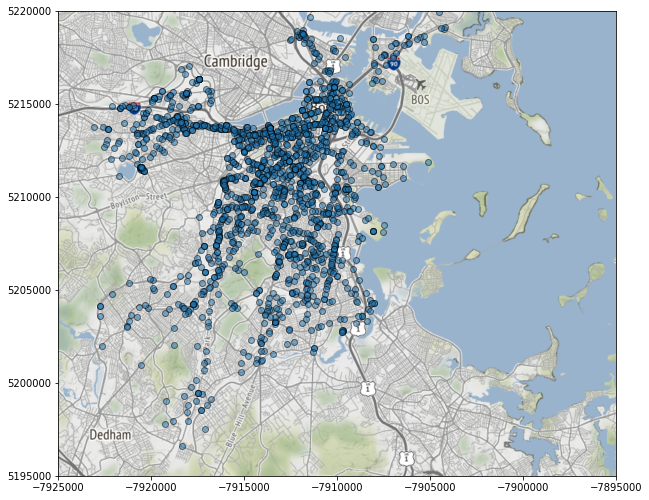

In [62]:
# Load the second crash dataset (2015-2018)
crash2 = pd.read_csv(data_path + 'crash_open_data.csv')
crash2['dispatch_ts'] = pd.to_datetime(crash2['dispatch_ts'])
crash2['year'] = crash2['dispatch_ts'].dt.year
crash2 = crash2[crash2.mode_type == 'bike']
crash2.index = range(len(crash2.index))

# Converting into a geopandas. Note that coordinates are encoded in EPSG:3586 (Massachusetts)
# See https://epsg.io/3586
geocrash2 = gpd.GeoDataFrame(crash2.drop(['x_cord', 'y_cord', 'lat', 'long'], axis=1),
                             crs={'init': 'epsg:3586'},
                             geometry=[geometry.Point(xy) for xy in zip(crash2.x_cord, crash2.y_cord)])
geocrash2 = to_x_y(geocrash2)
plot_on_map(geocrash2)
geocrash2

In [93]:
geocrash2[geocrash2.year == 2018]['xstreet2'].value_counts()

MASSACHUSETTS AVE      15
WASHINGTON ST          10
COMMONWEALTH AVE        6
DEAD END                6
CENTRE ST               6
CONGRESS ST             5
SOLDIERS FIELD RD       5
COLUMBUS AVE            5
TREMONT ST              4
BOYLSTON ST             4
DORCHESTER AVE          4
COLUMBIA RD             4
WESTERN AVE             4
CAMBRIDGE ST            4
SUTHERLAND RD           3
HARVARD AVE             3
DARTMOUTH ST            3
COLBURN ST              3
SUMMER ST               3
BIANCULLI BLVD          3
N HARVARD ST            3
BLUE HILL AVE           3
SLEEPER ST              3
HANOVER ST              3
SOUTH ST                3
SAINT MARYS ST          2
NONANTUM RD             2
LAMARTINE ST            2
HIGGINSON CIR           2
RIVERWAY                2
                       ..
NEWBURY ST              1
QUINCY ST               1
BLANDFORD MALL          1
SEABORN ST              1
WEST ROXBURY PKWY       1
HILL TOP ST             1
BABE RUTH PARK DR       1
DANA AVE    

In [100]:
# dummy GLM model to test sm.GLM
import statsmodels.api as sm
exog = (crash2.location_type == 'Intersection').astype(int).values
l = len(exog)
exog = np.append(exog, np.random.randint(2, size=500))
endog = np.append(np.ones(l), np.random.randint(2, size=500))
inter_model = sm.GLM(endog, sm.add_constant(exog), family=sm.families.Poisson())
inter_result = inter_model.fit()
inter_result.summary() 
# see https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html
# inter_result.summary2()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 2241
Model:                            GLM   Df Residuals:                     2239
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2228.2
Date:                Thu, 31 Jan 2019   Deviance:                       444.37
Time:                        16:58:13   Pearson chi2:                     235.
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1172      0.032     -3.656      0.000      -0.180      -0.054
x1             0.0125      0.045      0.280      0.779      -0.075       0.100
==============================================================================
"""

In [102]:
pd.date_range(1,10)

DatetimeIndex(['1970-01-01 00:00:00.000000001'], dtype='datetime64[ns]', freq='D')

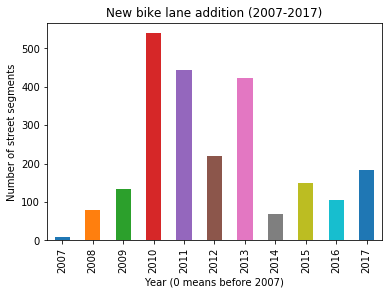

In [18]:
f = plt.figure()
geolanes['InstallDat'].value_counts().sort_index().plot(kind='bar')
plt.title('New bike lane addition (2007-2017)')
plt.xlabel('Year (0 means before 2007)')
plt.ylabel('Number of street segments')
f.savefig("hist_bike_lane_addition.png", bbox_inches='tight')

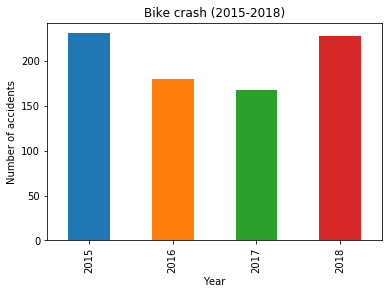

In [19]:
f = plt.figure()
geocrash2.query('mode_type == "bike" & location_type == "Street"')['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Bike crash (2015-2018)')
plt.xlabel('Year')
plt.ylabel('Number of accidents')
f.savefig("hist_bike_crash.png", bbox_inches='tight')

In [94]:
# Find the closest street segment to a point
def find_nearest_seg(point, lines):
    # Found a threshold of 20m based on looking at histogram:
    # geocrash1.geometry.apply(lambda p,l: l.distance(p).min(), args=(bostonsegs,)).hist()
    dist = lines.distance(point)
    id = dist.idxmin()
    return id if dist[id] < 20 else np.nan

# Build index to join crashes and bike lanes
geocrash1['geolanes_idx'] = geocrash1.geometry.apply(find_nearest_seg, args=(geolanes,))
geocrash2['geolanes_idx'] = geocrash2.geometry.apply(find_nearest_seg, args=(geolanes,))

#geocrash1['masegs_idx'] = geocrash1.geometry.apply(min_distance, args=(masegs,))
#geocrash1['bostonsegs_idx'] = geocrash1.geometry.apply(min_distance, args=(bostonsegs,))


In [21]:
import dill
dill.dump_session('notebook_env.db')
#dill.load_session('notebook_env.db')

In [95]:
import dateutil.relativedelta

# Compute before and after dates
idate = pd.to_datetime(geolanes['InstallDat'], format='%Y')
bdate = idate.apply(lambda d: d - dateutil.relativedelta.relativedelta(months=6))
adate = idate.apply(lambda d: d + dateutil.relativedelta.relativedelta(months=6))

# Build the dataset
def get_crash_num(seg_idx):
    bcrash1 = geocrash1.query('geolanes_idx == @seg_idx & DATE < @bdate[@seg_idx]')
    itv1 = 1 + abs(bdate[seg_idx].year - 2009) #nb of years between dataset start (2009) and bdate
    #display(bcrash1)
    bcrash2 = geocrash2.query('geolanes_idx == @seg_idx & dispatch_ts < @bdate[@seg_idx]')
    itv2 = 1 + abs(bdate[seg_idx].year - 2015)
    #display(bcrash2)
    bnum = len(bcrash1)/itv1 + len(bcrash2)/itv2
    
    acrash1 = geocrash1.query('geolanes_idx == @seg_idx & DATE > @adate[@seg_idx]')
    itv1 = 1 + abs(2012 - adate[seg_idx].year)
    #display(acrash1)
    acrash2 = geocrash2.query('geolanes_idx == @seg_idx & dispatch_ts > @adate[@seg_idx]')
    itv2 = 1 + abs(2018 - adate[seg_idx].year)
    #display(acrash2)
    anum = len(acrash1)/itv1 + len(acrash2)/itv2
    
    return bnum, anum
    
bnum = np.zeros(len(geolanes))
anum = np.zeros(len(geolanes))
for i in geolanes.index:
    bnum[i], anum[i] = get_crash_num(i)

geolanes['Before'] = pd.Series(bnum, index=geolanes.index)
geolanes['After'] = pd.Series(anum, index=geolanes.index)  
    
#find in geocrash1 and geocrash2 accidents for bikes before idate - 6 months
#find in geocrash1 and geocrash2 accidents for bikes before idate - 6 months
#compute the change dacc
#get the list of segs from geocrash1 & geocrash2 
#find those segs in masegs
#get features to describe those
#build the model

ValueError: time data '0' does not match format '%Y' (match)

In [24]:
feats = geolanes[['Before', 'After', 'FUNCTIONAL', 'Divided', 'Shape_Leng', 'TravelLane', 'OneWay']]
feats = pd.concat([feats, pd.get_dummies(feats['OneWay'], prefix='dum')], axis=1).drop('OneWay', axis=1)
feats = pd.concat([feats, pd.get_dummies(feats['FUNCTIONAL'], prefix='dum')], axis=1).drop('FUNCTIONAL', axis=1)
feats['Change'] = feats['After'] - feats['Before']

sel = geolanes['Before'] > 0 # only use bike lanes with accident before

feats

Before     After  Divided  Shape_Leng  TravelLane  dum_   dum_B  \
0     0.000000  0.000000        0   33.995267           2      0      1   
1     0.000000  0.333333        1  111.911219           2      0      0   
2     0.000000  0.333333        1   92.776397           3      0      0   
3     0.000000  0.777778        1   93.417217           2      0      0   
4     0.000000  2.166667        1   36.450628           2      0      0   
5     0.000000  0.000000        1   77.820774           2      0      0   
6     0.000000  0.000000        0   76.512560           2      0      1   
7     0.000000  0.000000        0  124.154736           2      0      1   
8     0.000000  0.000000        0   48.155416           1      0      0   
9     0.000000  0.500000        0   17.296481           2      0      1   
10    0.000000  0.714286        1   92.578061           2      0      0   
11    0.000000  0.111111        0  203.566577           2      0      1   
12    2.000000  3.444444        0   55.604721           3      0      1   
13    0.000000  0.250000        1  166.164138           1      0      0   
14    0.000000  0.600000        1   74.605633           2      0      0   
15    0.000000  0.000000        1   68.711426           0      1      0   
16    0.000000  0.888889        1   87.308515           2      0      0   
17    0.000000  0.333333        1   85.991987           2      0      0   
18    0.000000  0.111111        1   59.503083           2      0      0   
19    0.000000  0.000000        1   74.693018           3      0      0   
20    0.000000  0.777778        1   59.524277           2      0      0   
21    0.000000  0.333333        1   32.280146           2      0      0   
22    0.000000  0.000000        1   92.632532           2      0      0   
23    0.000000  0.111111        1   21.345666           3      0      0   
24    0.000000  0.000000        1  198.393907           3      0      0   
25    0.000000  0.444444        0  107.030728           2      0      1   
26    0.000000  0.000000        1   87.106103           4      0      0   
27    0.500000  1.000000        0  157.984148           2      0      1   
28    0.625000  0.500000        0   72.326659           2      0      1   
29    0.500000  1.000000        0   55.293649           2      0      1   
...        ...       ...      ...         ...         ...    ...    ...   
2323  0.000000  0.000000        0    6.053998           2      0      1   
2324  0.285714  0.000000        0   15.358777           0      1      0   
2325  0.333333  0.142857        1   66.390209           3      0      0   
2326  0.000000  0.666667        1  198.668296           3      0      0   
2327  0.000000  0.000000        0   40.108893           0      1      0   
2328  0.000000  0.000000        0   22.667219           1      0      0   
2329  0.000000  0.000000        1  281.809307           2      0      0   
2330  0.000000  0.000000        1   27.538396           4      0      0   
2331  0.000000  0.250000        1  182.703659           2      0      0   
2332  0.000000  0.111111        1   59.855585           2      0      0   
2333  0.000000  0.000000        0  139.825094           0      0      1   
2334  0.000000  1.777778        0   40.635372           2      0      1   
2335  0.000000  3.666667        1   67.658944           2      0      0   
2336  0.000000  1.000000        0   59.412007           2      0      1   
2337  0.000000  0.222222        1   81.811597           3      0      0   
2338  0.000000  0.750000        1   69.765333           3      0      0   
2339  0.000000  0.888889        1  197.204672           3      0      0   
2340  0.333333  0.285714        1   69.251630           3      0      0   
2341  0.000000  0.000000        1  238.538705           3      0      0   
2342  0.000000  0.000000        0   62.195575           2      0      1   
2343  0.000000  0.000000        0  113.490350           2      0      1   
2344  0.000000  0.000000        1

In [25]:
# Build index to join crashes and bike lanes
#geolanes['masegs_idx'] = geolanes.geometry.apply(find_nearest_seg, args=(masegs,))


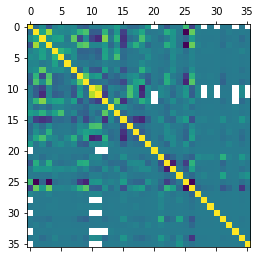

In [113]:
# Select continuous variables
cont = ['Rd_Seg_ID',
       'Num_Lanes', 'Opp_Lanes',
       'Surface_Wd', 'Shldr_Rt_W', 'Shldr_Lt_W',
       'Shldr_UL_W', 'Med_Width',
       'Lt_Sidewlk', 'Rt_Sidewlk',
       'Speed_Lim', 'Op_Dir_SL',
       'AADT', 'Length']
#cont = ['Rd_Seg_ID', 'AADT', 'Speed_Lim']
# Select categorical variables
#cat = ['Facility', 'F_Class', 'Surface_Tp', 
#       'Shldr_Rt_T', 'Shldr_Lt_T', 'Shldr_UL_T', 'Med_Type',
#       'Curb', 'Pd_Sf_Type', 'Pd_Fc_Type', 'Struct_Cnd',
#       'Operation', 'Terrain']
cat = ['F_F_Class', 'Struct_Cnd', 'Surface_Tp']

feats2 = masegs[cont]
feats2 = pd.concat([feats2, pd.get_dummies(masegs[cat])], axis=1)
feats2

# Build the common indentifier between geolanes and masegs
feats['Rd_Seg_ID'] = geolanes['ROADINVENT'].apply(lambda f: int(f/100))
#feats = feats[sel]

# Join !
feats3 = feats.join(feats2.drop_duplicates('Rd_Seg_ID').set_index('Rd_Seg_ID'), on='Rd_Seg_ID')
feats3
plt.matshow(feats2.corr())

In [209]:
import statsmodels.api as sm
feats4 = feats3.dropna()
y = (feats4['After'] / feats4['AADT']).values
X = feats4.iloc[:,15:].values
#X = sm.add_constant(X)
model = sm.OLS(y, X)
result2 = model.fit()
print(result2.params)
result2.summary()

[-5.70904972e-05 -8.46516944e-05  1.91308831e-06 -2.94814208e-06
 -1.67937920e-05 -1.68599486e-06  5.17112384e-06 -1.32223396e-06
  6.07357388e-06 -7.11289256e-07  2.79838196e-07 -1.52632635e-09
  5.54240555e-04 -1.03392550e-16  5.63160251e-17  2.25908626e-03
  2.24554520e-03  2.29738027e-03  2.39820590e-18 -1.10183076e-18
 -1.79095591e-04 -1.43807144e-04 -2.04809032e-04  0.00000000e+00
  1.49655100e-02 -2.01361860e-03 -2.03836132e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.07090450e-03
  0.00000000e+00 -2.04061382e-03  0.00000000e+00]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     89.54
Date:                Fri, 25 Jan 2019   Prob (F-statistic):          8.46e-277
Time:                        12:01:12   Log-Likelihood:                 11233.
No. Observations:                1992   AIC:                        -2.242e+04
Df Residuals:                    1969   BIC:                        -2.229e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -5.709e-05   4.26e-05     -1.339      0.181      -0.000    2.65e-05
x2         -8.465e-05   3.37e-05     -2.515      0.012      -0.000   -1.87e-05
x3          1.913e-06   2.67e-06      0.716      0.474   -3.33e-06    7.15e-06
x4         -2.948e-06   2.54e-05     -0.116      0.908   -5.28e-05    4.69e-05
x5         -1.679e-05      0.000     -0.110      0.912      -0.000       0.000
x6         -1.686e-06   5.52e-05     -0.031      0.976      -0.000       0.000
x7          5.171e-06   1.54e-06      3.354      0.001    2.15e-06    8.19e-06
x8         -1.322e-06   6.14e-06     -0.215      0.830   -1.34e-05    1.07e-05
x9          6.074e-06    7.2e-06      0.843      0.399   -8.05e-06    2.02e-05
x10        -7.113e-07   1.12e-06     -0.633      0.526   -2.91e-06    1.49e-06
x11         2.798e-07    9.4e-07      0.298      0.766   -1.56e-06    2.12e-06
x12        -1.526e-09   1.83e-09     -0.835      0.404   -5.11e-09    2.06e-09
x13            0.0006      0.001      0.851      0.395      -0.001       0.002
const      -1.034e-16    2.6e-16     -0.397      0.691   -6.14e-16    4.07e-16
x14         5.632e-17   1.37e-16      0.412      0.680   -2.12e-16    3.24e-16
x15            0.0023      0.000     10.570      0.000       0.002       0.003
x16            0.0022      0.000     11.175      0.000       0.002       0.003
x17            0.0023      0.000     12.016      0.000       0.002       0.003
x18         2.398e-18   5.27e-18      0.455      0.649   -7.93e-18    1.27e-17
x19        -1.102e-18   3.31e-18     -0.332      0.740    -7.6e-18     5.4e-18
x20           -0.0002      0.000     -0.536      0.592      -0.001       0.000
x21           -0.0001      0.000     -0.459      0.646      -0.001       0.000
x22           -0.0002      0.000     -0.652      0.515      -0.001       0.000
x23                 0          0        nan        nan           0           0
x24            0.0150      0.000     38.858      0.000       0.014       0.016
x25           -0.0020      0.000    -10.728      0.000      -0.002      -0.002
x26           -0.0020      0.000     -4.765      0.000      -0.003      -0.001
x27                 0          0        nan        nan           0           0
x28                 0          0        nan        nan           0           0
x29                 0          0        nan        nan           0           0
x30                 0          0        nan        nan           0           0
x31           -0.0021      0.000     -8.037      0.000      -0.003      -0.002
x32                 0          0        nan        nan           0           0
x33           -0.0020      0.000     -7.676      0.000      -0.003      -0.002
x34                 0          0        nan        nan           0           0
==============================================================================
Om

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
clf = GradientBoostingRegressor(n_estimators=100, max_depth=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6670829103125975

In [73]:
import osmnx as ox
G = ox.gdf_from_place('Bay State Road, Boston, MA, USA')

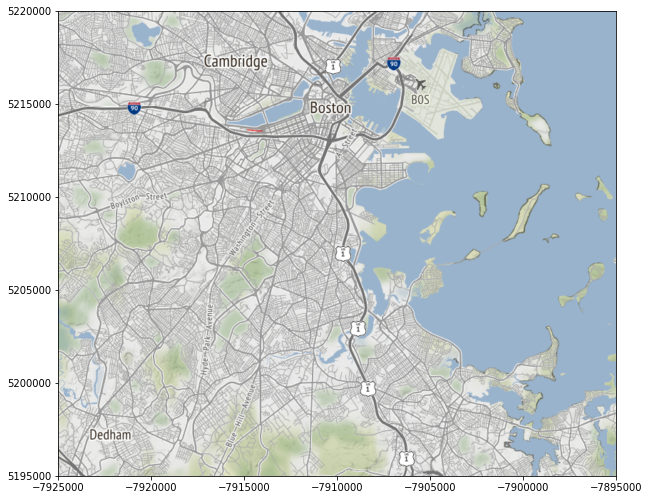

In [99]:
gg=gpd.GeoDataFrame(G, crs={'init': 'epsg:4326'})
plot_on_map(gg, 'r')
f = plt.gcf()
f.savefig("map.png")

In [102]:
feats_app = geolanes
feats_app['Rd_Seg_ID'] = feats_app['ROADINVENT'].apply(lambda f: int(f/100))
feats_app = feats_app.join(feats2.drop_duplicates('Rd_Seg_ID').set_index('Rd_Seg_ID'), on='Rd_Seg_ID')

In [103]:
feats_app

FID  OBJECTID                               STREET_NAM  ROADINVENT  \
0     1001      8777                            Warren Street     4714200   
1     1002      8785                         Blue Hill Avenue     5175300   
2     1003      8792                         Blue Hill Avenue     6282300   
3     1004      8794                         Blue Hill Avenue     4966300   
4     1005      8803                            Morton Street     5690800   
5     1006      8804                  American Legion Highway     6236100   
6     1007      8810                            Walnut Avenue     5308200   
7     1008      8811                            Walnut Avenue     4710200   
8     1009      8834                          Thornton Street     5832200   
9     1010      8848                           Tremont Street     5780900   
10    1011      8854                        Huntington Avenue     6261600   
11    1012      8855                              Museum Road     5381200   
12    1013      8856                           Ruggles Street     6305500   
13    1014      8857                              Forsyth Way     5424900   
14    1015      8863                      Commonwealth Avenue     6224600   
15    1016      8864                         Brookline Avenue    45732100   
16    1017      8883                         Blue Hill Avenue     5124200   
17    1018      8885                         Blue Hill Avenue     6223900   
18    1019      8892                         Blue Hill Avenue     6218800   
19    1020      8893                         Blue Hill Avenue     6219100   
20    1021      8899                         Blue Hill Avenue     6219300   
21    1022      8900                         Blue Hill Avenue     6219400   
22    1023      8902                         Blue Hill Avenue     4856600   
23    1024      8903                         Blue Hill Avenue     5111300   
24    1025      8910                         Blue Hill Avenue     4805400   
25    1026      8911                            Talbot Avenue     5691000   
26    1027      8913                         Blue Hill Avenue     6227300   
27    1028      8921                          Humboldt Avenue     4693200   
28    1029      8922                          Humboldt Avenue     4683800   
29    1030      8923                          Humboldt Avenue     4674200   
...    ...       ...                                      ...         ...   
2323  2564     19002                         Cambridge Street    45701300   
2324  2565     18260                            Walter Street     6240000   
2325  2566     19009                         Blue Hill Avenue     5139000   
2326  2568     19017                         Blue Hill Avenue     4762400   
2327  2569     18261                            Walter Street     6294700   
2328  2571     19018                                 Old Road     5384100   
2329  2572     18262                            Centre Street     6211800   
2330  2574     19019                            Columbia Road     6255100   
2331  2575     18269                            Centre Street     6221700   
2332  2577     19020                            Columbia Road     5402200   
2333  2578     20864  Emerald Necklace Trail/Route 9 Crossing           0   
2334  2579     18277                           Harvard Avenue     5871600   
2335  2580     19025                            Columbia Road     6246500   
2336  2582     18293                     North Harvard Street     4451700   
2337  2583     19027                            Columbia Road     5776500   
2338  2585     18295                         Cambridge Street     6264900   
2339  2586     19029                            Columbia Road     6246600   
2340  2588     19031                         Blue Hill Avenue     5223400   
2341  2589     18297                         Cambridge Street     5609600   
2342  2590     19034                            Warren Street     4695700   
234

In [135]:
out=to_x_y(gg).geometry.apply(find_nearest_seg, args=(feats_app,))

In [136]:
out

0    404
Name: geometry, dtype: int64

In [147]:
feats_app

FID  OBJECTID                               STREET_NAM  ROADINVENT  \
0     1001      8777                            Warren Street     4714200   
1     1002      8785                         Blue Hill Avenue     5175300   
2     1003      8792                         Blue Hill Avenue     6282300   
3     1004      8794                         Blue Hill Avenue     4966300   
4     1005      8803                            Morton Street     5690800   
5     1006      8804                  American Legion Highway     6236100   
6     1007      8810                            Walnut Avenue     5308200   
7     1008      8811                            Walnut Avenue     4710200   
8     1009      8834                          Thornton Street     5832200   
9     1010      8848                           Tremont Street     5780900   
10    1011      8854                        Huntington Avenue     6261600   
11    1012      8855                              Museum Road     5381200   
12    1013      8856                           Ruggles Street     6305500   
13    1014      8857                              Forsyth Way     5424900   
14    1015      8863                      Commonwealth Avenue     6224600   
15    1016      8864                         Brookline Avenue    45732100   
16    1017      8883                         Blue Hill Avenue     5124200   
17    1018      8885                         Blue Hill Avenue     6223900   
18    1019      8892                         Blue Hill Avenue     6218800   
19    1020      8893                         Blue Hill Avenue     6219100   
20    1021      8899                         Blue Hill Avenue     6219300   
21    1022      8900                         Blue Hill Avenue     6219400   
22    1023      8902                         Blue Hill Avenue     4856600   
23    1024      8903                         Blue Hill Avenue     5111300   
24    1025      8910                         Blue Hill Avenue     4805400   
25    1026      8911                            Talbot Avenue     5691000   
26    1027      8913                         Blue Hill Avenue     6227300   
27    1028      8921                          Humboldt Avenue     4693200   
28    1029      8922                          Humboldt Avenue     4683800   
29    1030      8923                          Humboldt Avenue     4674200   
...    ...       ...                                      ...         ...   
2323  2564     19002                         Cambridge Street    45701300   
2324  2565     18260                            Walter Street     6240000   
2325  2566     19009                         Blue Hill Avenue     5139000   
2326  2568     19017                         Blue Hill Avenue     4762400   
2327  2569     18261                            Walter Street     6294700   
2328  2571     19018                                 Old Road     5384100   
2329  2572     18262                            Centre Street     6211800   
2330  2574     19019                            Columbia Road     6255100   
2331  2575     18269                            Centre Street     6221700   
2332  2577     19020                            Columbia Road     5402200   
2333  2578     20864  Emerald Necklace Trail/Route 9 Crossing           0   
2334  2579     18277                           Harvard Avenue     5871600   
2335  2580     19025                            Columbia Road     6246500   
2336  2582     18293                     North Harvard Street     4451700   
2337  2583     19027                            Columbia Road     5776500   
2338  2585     18295                         Cambridge Street     6264900   
2339  2586     19029                            Columbia Road     6246600   
2340  2588     19031                         Blue Hill Avenue     5223400   
2341  2589     18297                         Cambridge Street     5609600   
2342  2590     19034                            Warren Street     4695700   
234

In [211]:
import pickle
PIK = "pickle.dat"

data = {'feats': feats_app, 'model': result2}
with open(PIK, "wb") as f:
    pickle.dump(data, f)

In [210]:
result2.predict(feats_app.iloc[6, 21:].values) * feats_app['AADT'][6]

array([0.18912567529675617], dtype=object)

In [153]:
feats_app.iloc[404, 21:].values

array([3.0, 0.0, 22.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 30.0, 0.0, 22127.0,
       0.04351569, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
      dtype=object)

In [158]:
model.predict(X[1]).mean()

962385311.0302646

In [159]:
clf.predict(X[0])

ValueError: Expected 2D array, got 1D array instead:
array=[2.000000e+00 0.000000e+00 4.000000e+01 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 8.000000e+00 8.000000e+00 3.000000e+01
 3.000000e+01 1.047300e+04 2.101833e-02 0.000000e+00 0.000000e+00
 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [166]:
clf.predict(X[0])

ValueError: Expected 2D array, got 1D array instead:
array=[1.000000e+00 2.000000e+00 0.000000e+00 4.000000e+01 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 8.000000e+00 8.000000e+00
 3.000000e+01 3.000000e+01 1.047300e+04 2.101833e-02 0.000000e+00
 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [162]:
X = sm.add_constant(X)

In [173]:
X[0].ndim

1

Text(0.5, 0, 'Accidents after-before installation')

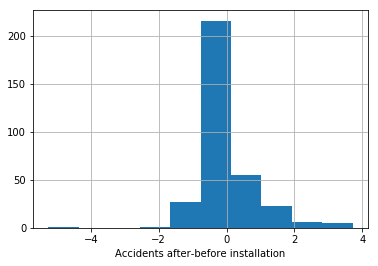

In [217]:
(geolanes['After']/1.2 - geolanes['Before'])[sel].hist()
plt.xlabel('Accidents after-before installation')

# Note: here are the features used by the D4D project

f_cat:
- width
- cycleway_type
- signal
- oneway
- SPEEDLIMIT
- Struct_Cnd
- Surface_Tp
- F_F_Class

f_cont:
- lanes
- hwy_type
- osm_speed
- width_per_lane
- AADT


In [106]:
import geojson

def data2geojson(df):
    features = []
    insert_features = lambda X: features.append(
            geojson.Feature(geometry=X['geometry'],
                            properties=dict(name=X['SEGMENT_ID'])))
    df.apply(insert_features, axis=1)
    with open('map1.geojson', 'w', encoding='utf8') as fp:
        geojson.dump(geojson.FeatureCollection(features), fp, sort_keys=True, ensure_ascii=False)

data2geojson(bostonsegs)

In [108]:
import networkx as nx

In [ ]:
G = nx.read_shp('') 